In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv('../Data/comptagesvelo2015.csv')

In [4]:
df.head()

,Date,Unnamed: 1,Berri1,Boyer,Brébeuf,CSC (Côte Sainte-Catherine),Maisonneuve_1,Maisonneuve_2,Maisonneuve_3,Notre-Dame,...,Pont_Jacques_Cartier,Rachel / Hôtel de Ville,Rachel / Papineau,René-Lévesque,Saint-Antoine,Saint-Laurent U-Zelt Test,Saint-Urbain,Totem_Laurier,University,Viger
0,01/01/2015,00:00,58,12,4,17,33.0,49,21,16,...,NaN,58,91,24,3,NaN,17,78,21,6
1,02/01/2015,00:00,75,7,5,15,30.0,113,27,9,...,NaN,109,177,32,13,NaN,11,57,77,4
2,03/01/2015,00:00,79,7,3,7,30.0,107,36,12,...,NaN,71,131,33,5,NaN,14,174,40,5
3,04/01/2015,00:00,10,1,21,0,10.0,35,29,1,...,NaN,6,11,6,1,NaN,1,20,6,0
4,05/01/2015,00:00,42,0,2,0,27.0,90,21,1,...,NaN,0,5,49,20,NaN,0,41,56,10


In [5]:
"""
    Step 1: Obtain basic information about the dataframe
        - how many rows does the dataframe have
        - how many columns does the dataframe have
        - how many unique values does each column contain
        - what are the unique values in each column
        - how many entries in each column are filled (non null)
        - how many entries in each row are filled (non null)
        
    Things to observe:
        - is there any column that corresponds to the 'label', if so, which one
        - is there any degenerate column, e.g., with ony one unique value
        - are there any duplicate rows ? are there any duplicate columns ?
        - is data clean ? does it require further cleaning ?
        - how many columns are numerical/categorical/ordinal ?
        - what are the scales in the numerical columns ?
    
"""
def show_basic_info(df):
    print("There are {} rows and {} columns \n".format(df.shape[0], df.shape[1]))
    columns = df.columns.tolist()
    """
        x.count counts the number of non-null values
    """
    column_counts = df.apply(lambda x: x.count(), axis=0)
    for column in columns:
        print("The column  '{}' has {} non-null values".format(column, column_counts[column]))
        print("The column '{}' has {} unique values".format(column, df[column].nunique()))
        # print("The unique values are: \n {} \n".format(df[column].unique().tolist()))
        print("The unique values and their counts are: \n{} \n".format(df[column].value_counts()))
        
    row_counts = df.apply(lambda x: x.count(), axis=1)    
    print("The number of non-null values in each row are:")
    print(row_counts)
    
"""
    Issue to fix:
    print(row_counts) gives a long result with ... 
    Therefore only a part of the result is visible
    How does one see the entire result ?
"""    

show_basic_info(df)

There are 319 rows and 23 columns 

The column  'Date' has 319 non-null values
The column 'Date' has 319 unique values
The unique values and their counts are: 
15/11/2015    1
01/01/2015    1
21/08/2015    1
17/05/2015    1
29/07/2015    1
03/04/2015    1
13/06/2015    1
13/04/2015    1
15/02/2015    1
25/08/2015    1
06/09/2015    1
02/10/2015    1
18/09/2015    1
28/08/2015    1
03/02/2015    1
01/05/2015    1
20/05/2015    1
29/08/2015    1
11/01/2015    1
13/07/2015    1
17/06/2015    1
23/02/2015    1
02/04/2015    1
08/01/2015    1
20/04/2015    1
06/02/2015    1
12/02/2015    1
07/06/2015    1
15/10/2015    1
14/03/2015    1
             ..
16/08/2015    1
08/10/2015    1
01/02/2015    1
13/03/2015    1
08/03/2015    1
26/03/2015    1
15/07/2015    1
24/01/2015    1
24/07/2015    1
03/11/2015    1
27/03/2015    1
16/10/2015    1
10/11/2015    1
23/08/2015    1
14/04/2015    1
06/03/2015    1
02/09/2015    1
11/03/2015    1
15/01/2015    1
10/07/2015    1
05/03/2015    1
07/10/20

In [6]:
"""
    What do we do with null values ?
    Replace them with 0 ?
"""

df.fillna(0, inplace=True)

In [7]:
show_basic_info(df)

There are 319 rows and 23 columns 

The column  'Date' has 319 non-null values
The column 'Date' has 319 unique values
The unique values and their counts are: 
15/11/2015    1
01/01/2015    1
21/08/2015    1
17/05/2015    1
29/07/2015    1
03/04/2015    1
13/06/2015    1
13/04/2015    1
15/02/2015    1
25/08/2015    1
06/09/2015    1
02/10/2015    1
18/09/2015    1
28/08/2015    1
03/02/2015    1
01/05/2015    1
20/05/2015    1
29/08/2015    1
11/01/2015    1
13/07/2015    1
17/06/2015    1
23/02/2015    1
02/04/2015    1
08/01/2015    1
20/04/2015    1
06/02/2015    1
12/02/2015    1
07/06/2015    1
15/10/2015    1
14/03/2015    1
             ..
16/08/2015    1
08/10/2015    1
01/02/2015    1
13/03/2015    1
08/03/2015    1
26/03/2015    1
15/07/2015    1
24/01/2015    1
24/07/2015    1
03/11/2015    1
27/03/2015    1
16/10/2015    1
10/11/2015    1
23/08/2015    1
14/04/2015    1
06/03/2015    1
02/09/2015    1
11/03/2015    1
15/01/2015    1
10/07/2015    1
05/03/2015    1
07/10/20

In [18]:
#features = df.columns.tolist()
#features.remove('Unnamed: 1')

In [17]:
df = df[features]
df.head()

,Date,Berri1,Boyer,Brébeuf,CSC (Côte Sainte-Catherine),Maisonneuve_1,Maisonneuve_2,Maisonneuve_3,Notre-Dame,Parc,...,Pont_Jacques_Cartier,Rachel / Hôtel de Ville,Rachel / Papineau,René-Lévesque,Saint-Antoine,Saint-Laurent U-Zelt Test,Saint-Urbain,Totem_Laurier,University,Viger
0,01/01/2015,58,12,4,17,33.0,49,21,16,16,...,0.0,58,91,24,3,0.0,17,78,21,6
1,02/01/2015,75,7,5,15,30.0,113,27,9,32,...,0.0,109,177,32,13,0.0,11,57,77,4
2,03/01/2015,79,7,3,7,30.0,107,36,12,18,...,0.0,71,131,33,5,0.0,14,174,40,5
3,04/01/2015,10,1,21,0,10.0,35,29,1,0,...,0.0,6,11,6,1,0.0,1,20,6,0
4,05/01/2015,42,0,2,0,27.0,90,21,1,1,...,0.0,0,5,49,20,0.0,0,41,56,10


In [20]:
import seaborn as sns

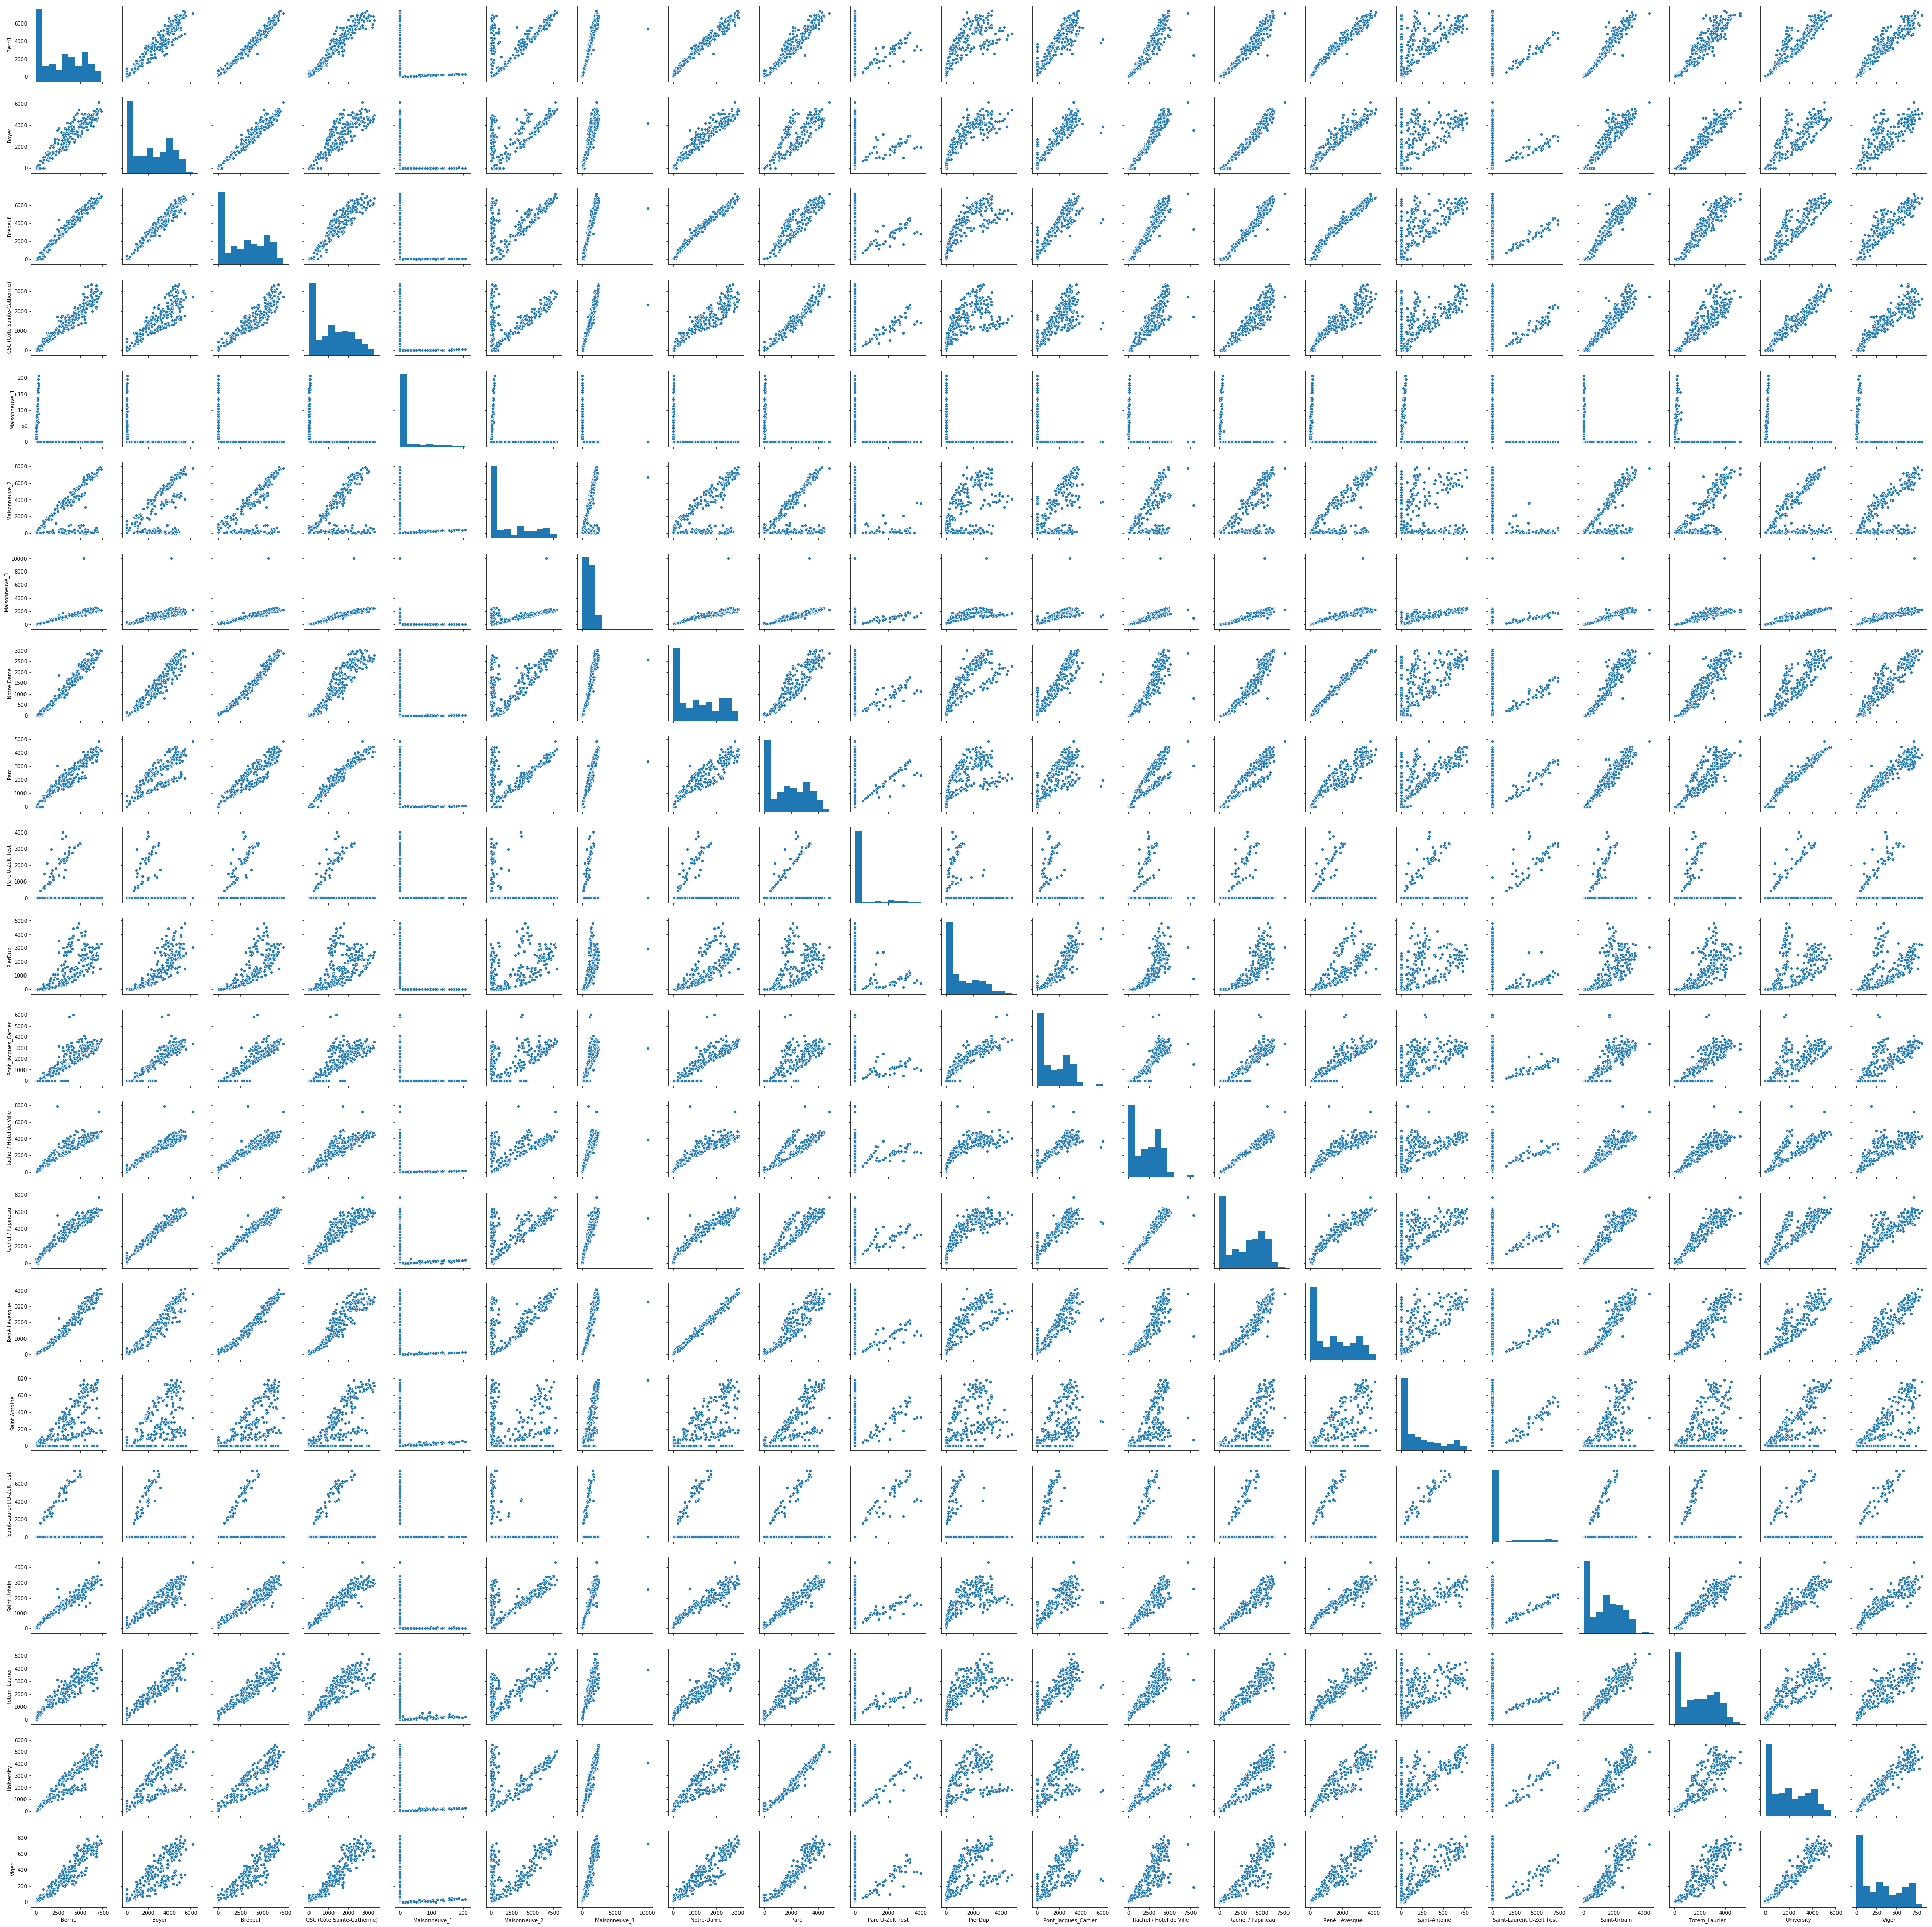

In [22]:
sns.pairplot(df)

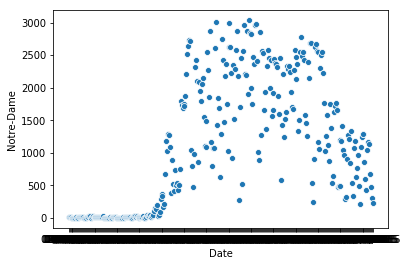

In [23]:
sns.scatterplot(df['Date'],df['Notre-Dame'])

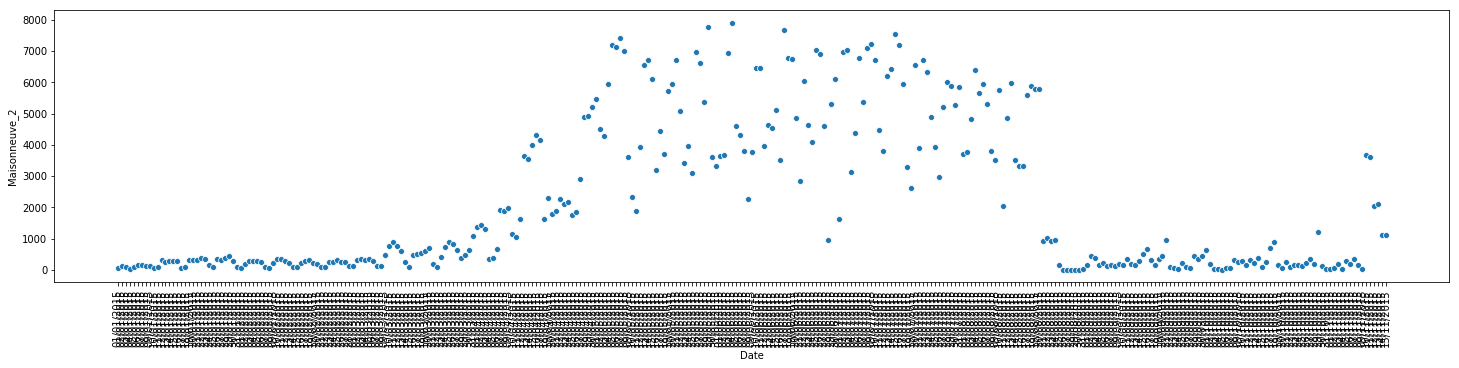

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,5))
plt.xticks(rotation = 90)
sns.scatterplot(df['Date'],df['Maisonneuve_2'])

In [1]:
import findspark

In [2]:
findspark.init('/home/raghav/spark-2.4.0-bin-hadoop2.7/')

In [3]:
import pyspark

In [4]:
import time

In [5]:
def fun(x):
    time.sleep(1)
    return x*x

from pyspark import SparkContext 
sc = SparkContext.getOrCreate()

start = time.time()
A = list(range(100))
rdd = sc.parallelize(A)
rdd.map(fun).collect()
end = time.time()

print(end-start)


16.92453622817993
